In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import all the modules that I need for the lab

In [ ]:
import pandas
import numpy
import geopandas
import matplotlib.pyplot as plt

In [ ]:
#Get the data
aviation = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/aviation.csv")

# Question 1
Create a map of the 100 airports with the most flights in 2021, where the color or size of the point is determined by the number of flights.

In [ ]:
#Get the data of the flights in 2021
aviation_2021 = aviation[aviation['start_date']=='2021-01-01']
aviation_2021

,Unnamed: 0,start_date,end_date,airport_code,asset_name,iso3_country,number_of_flights,total_fuel_consumed_tonnes,trip_classification,CO2_emissions_tonnes,CH4_emissions_tonnes,N2O_emissions_tonnes,CO2_emissions_factor,CH4_emissions_factor,N2O_emissions_factor,geometry
16691,16714,2021-01-01,2021-12-31,AAA,Anaa,PYF,84,3.497416,domestic,64.430599,0.000452,0.001807,18.422342,0.000129,0.000517,POINT (-145.509995 -17.3526)
16692,16715,2021-01-01,2021-12-31,AAD,Adado Airport,SOM,96,2.114016,domestic,160.326994,0.001124,0.004495,75.840000,0.000532,0.002126,POINT (46.6375 6.095802)
16693,16716,2021-01-01,2021-12-31,AAE,Les Salines,DZA,2341,38.193501,domestic,8891.566261,0.062325,0.249302,232.803119,0.001632,0.006527,POINT (7.81334 36.826781)
16694,16717,2021-01-01,2021-12-31,AAE,Les Salines,DZA,10,5.774840,international,91.242475,0.000640,0.002558,15.800000,0.000111,0.000443,POINT (7.81334 36.826781)
16695,16718,2021-01-01,2021-12-31,AAK,Aranuka,KIR,210,0.477544,domestic,44.106292,0.000309,0.001237,92.360632,0.000647,0.002590,POINT (173.636993 0.185278)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,22093,2021-01-01,2021-12-31,ZWL,Wollaston Lake,CAN,440,3.526190,domestic,368.959398,0.002586,0.010345,104.634021,0.000733,0.002934,POINT (-103.171997070313 58.1068992614746)
22054,22094,2021-01-01,2021-12-31,ZYI,Zunyi,CHN,16103,776.979996,domestic,132474.812443,0.928581,3.714325,170.499644,0.001195,0.004780,POINT (107.0007 27.5895)
22055,22095,2021-01-01,2021-12-31,ZYL,Osmani International,BGD,5338,37.473713,domestic,10141.102789,0.071084,0.284336,270.619110,0.001897,0.007588,POINT (91.86484299999999 24.963832)
22056,22096,2021-01-01,2021-12-31,ZYL,Osmani International,BGD,640,426.601113,international,44027.732222,0.308612,1.234448,103.205854,0.000723,0.002894,POINT (91.86484299999999 24.963832)


In [ ]:
#Make the 2021 flight data into GeoDataFrame 
aviation_gdf = geopandas.GeoDataFrame(
    aviation_2021,
    geometry = geopandas.GeoSeries.from_wkt(aviation["geometry"])
)

#Sort the data by number of flights in desceding order
aviation_gdf = aviation_gdf.sort_values('number_of_flights',ascending=False)

In [ ]:
#Get the top 100 data
aviation_top = aviation_gdf.head(100)
aviation_top 

,Unnamed: 0,start_date,end_date,airport_code,asset_name,iso3_country,number_of_flights,total_fuel_consumed_tonnes,trip_classification,CO2_emissions_tonnes,CH4_emissions_tonnes,N2O_emissions_tonnes,CO2_emissions_factor,CH4_emissions_factor,N2O_emissions_factor,geometry
16947,16970,2021-01-01,2021-12-31,ATL,Hartsfield-jackson Atlanta International,USA,573308,10953.493469,domestic,5.140171e+06,36.029995,144.119981,469.272283,0.003289,0.013157,POINT (-84.42810 33.63670)
20075,20105,2021-01-01,2021-12-31,ORD,Chicago O'hare International,USA,541910,15867.649544,domestic,4.898574e+06,34.336523,137.346093,308.714529,0.002164,0.008656,POINT (-87.90480 41.97860)
17731,17754,2021-01-01,2021-12-31,DFW,Dallas/Fort Worth International,USA,520487,9606.047971,domestic,4.767315e+06,33.416462,133.665849,496.282624,0.003479,0.013915,POINT (-97.03800 32.89680)
17728,17751,2021-01-01,2021-12-31,DEN,Denver International,USA,501237,14012.445531,domestic,4.582474e+06,32.120819,128.483277,327.028821,0.002292,0.009169,POINT (-104.67300 39.86170)
17527,17550,2021-01-01,2021-12-31,CLT,Charlotte Douglas,USA,409215,4763.090740,domestic,2.675720e+06,18.755443,75.021771,561.761297,0.003938,0.015751,POINT (-80.94310 35.21400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20651,2021-01-01,2021-12-31,RUH,King Khaled International,SAU,96572,822.480059,domestic,7.980148e+05,5.593679,22.374718,970.254239,0.006801,0.027204,POINT (46.69880 24.95760)
17462,17485,2021-01-01,2021-12-31,CGQ,Changchun,CHN,94603,4229.828205,domestic,1.045441e+06,7.328009,29.312036,247.159105,0.001732,0.006930,POINT (125.68500 43.99620)
18559,18584,2021-01-01,2021-12-31,ICN,Seoul (Incheon),KOR,94383,30615.327996,international,5.915899e+06,41.467455,165.869820,193.233231,0.001354,0.005418,POINT (126.45100 37.46910)
20786,20823,2021-01-01,2021-12-31,SJU,Luis Munoz Marin International,PRI,94152,2915.474054,international,9.797922e+05,6.867848,27.471390,336.066185,0.002356,0.009423,POINT (-66.00180 18.43940)


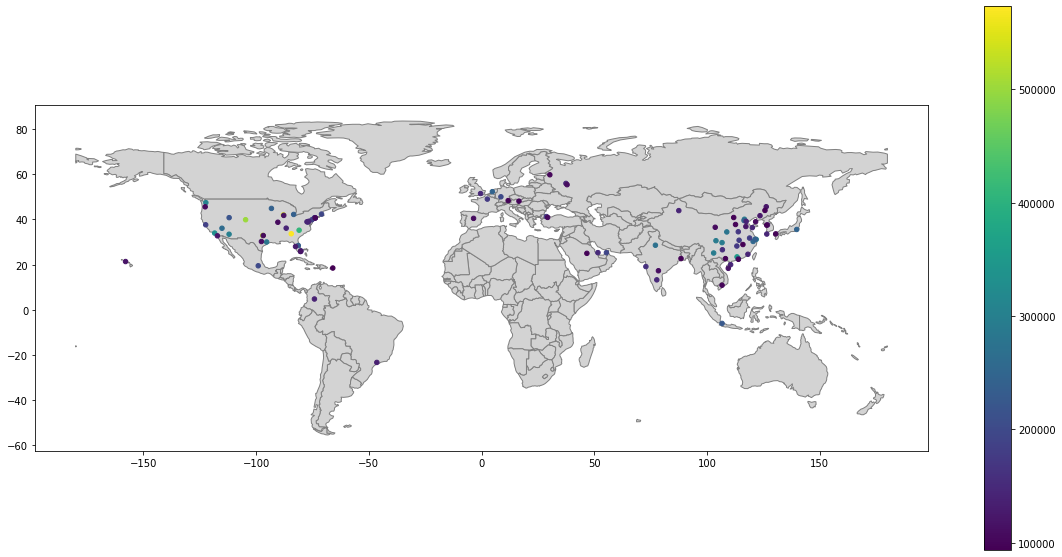

In [ ]:
#Create a map
fig,ax = plt.subplots(figsize=(20,10))

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world = world[world["continent"] != "Antarctica"]

world.plot(
    ax=ax,
    edgecolor="grey",
    color="lightgrey",
)

aviation_top.plot(
    ax=ax,
    markersize=20,
    column='number_of_flights',
    legend=True
)

# Question 2
Create a chloropleth map of the total emissions from the aviation sector by country. Resecale the emissions so that the colors shows some variation (i.e., use numpy.log to rescale).

##### To create a chloropleth map of the toal emissions from the aviation sector by country, I used groupby() method to group by country and sum all the number to get the total emissions.

In [ ]:
sum_df = aviation.groupby("iso3_country").sum()

sum_df.head()

,Unnamed: 0,number_of_flights,total_fuel_consumed_tonnes,CO2_emissions_tonnes,CH4_emissions_tonnes,N2O_emissions_tonnes,CO2_emissions_factor,CH4_emissions_factor,N2O_emissions_factor
iso3_country,,,,,,,,,
ABW,56910,99023,7868.776175,1.217825e+06,8.536339,34.145354,897.697763,0.006292,0.025170
AFG,1266450,101333,6624.031977,1.046235e+06,7.333577,29.334309,14319.448657,0.100372,0.401488
AGO,945158,89055,12283.496923,1.859257e+06,13.032453,52.129814,26190.179899,0.183580,0.734320
AIA,57022,30507,50.107041,4.890966e+03,0.034283,0.137133,911.814635,0.006391,0.025565
ALB,77863,92196,7080.099901,7.147916e+05,5.010327,20.041309,721.019247,0.005054,0.020216


In [ ]:
#Merge with the world data
subset_df = world.merge(sum_df,left_on="iso_a3",right_on="iso3_country",how="right")

#Drop missing values
subset_df=subset_df.dropna()

#Sort the values in descending order of total emissions
subset_df=subset_df.sort_values("CO2_emissions_tonnes",ascending=False)
subset_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Unnamed: 0,number_of_flights,total_fuel_consumed_tonnes,CO2_emissions_tonnes,CH4_emissions_tonnes,N2O_emissions_tonnes,CO2_emissions_factor,CH4_emissions_factor,N2O_emissions_factor
218,3.266258e+08,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",53624867,68490407,2.326407e+06,7.653438e+08,5364.672747,21458.690988,2.309510e+06,16.188499,64.753996
38,1.379303e+09,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",21404610,39265044,1.794432e+06,4.506369e+08,3158.736289,12634.945156,4.179932e+05,2.929921,11.719682
73,6.476945e+07,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",5594153,6169231,4.751826e+05,1.105702e+08,775.040770,3100.163081,1.934967e+05,1.356314,5.425255
107,1.264514e+08,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",7190519,8108747,2.719034e+05,1.071962e+08,751.391329,3005.565314,3.350721e+05,2.348686,9.394744
97,1.281936e+09,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",9119629,9124624,3.135562e+05,9.451420e+07,662.496690,2649.986759,2.647038e+05,1.855440,7.421759


In [ ]:
#Used numpy.log() to rescale
subset_df["log_emissions"] = numpy.log(subset_df["CO2_emissions_tonnes"])

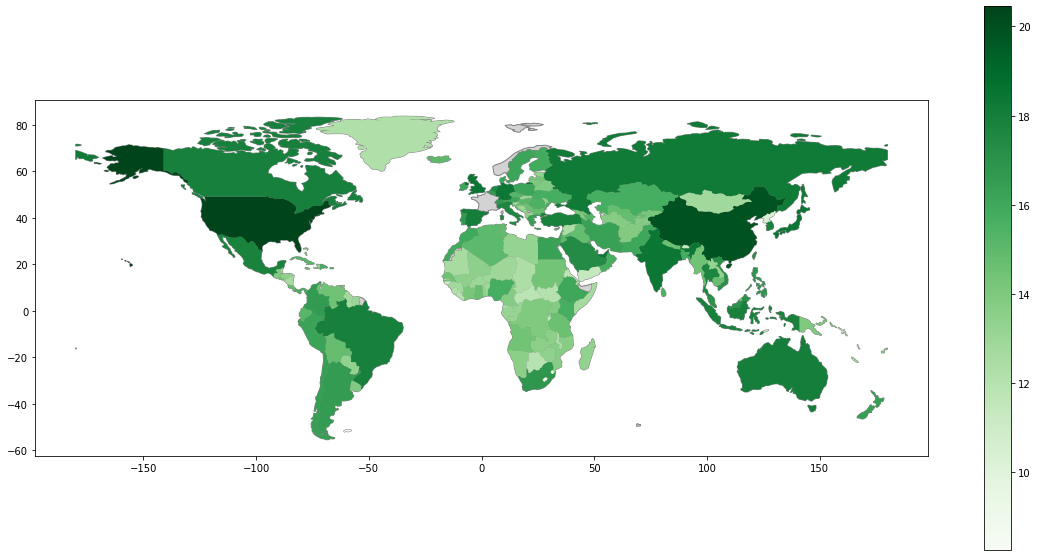

In [ ]:
#Create a map
fig,ax=plt.subplots(figsize=(20,10))

world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="grey"
)

subset_df.plot(
  ax=ax,
  markersize=2, 
  column="log_emissions",
  legend=True,
  cmap='Greens'
)

# Question 3
Create a line chart that shows the time series of emissions over time for 4 major airports of your choosing. Create another one with fuel consumption for those airports. Bonus if you can do this within a function, where a list of four airports is the input.

In [ ]:
#Fuction "emission_times" create a line char that shows the times series of emissions over time
def emission_times(myChoice):
      #Get the data of my choice, group the values by "end_date" and sum all the values
      airport = aviation[(aviation["airport_code"] == myChoice)].groupby(["end_date"]).sum()

      #Create a line chart
      plt.plot(
          airport.index,
          airport["CO2_emissions_tonnes"],
          label=myChoice
      )
      
      #print the legned
      plt.legend()

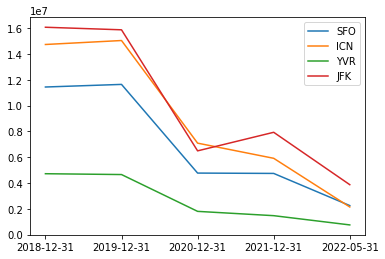

In [ ]:
emission_times("SFO")
emission_times("ICN")
emission_times("YVR")
emission_times("JFK")

In [ ]:
#Fuction "fuel" create a line char that shows the fuel consumption for airport
def fuel(myChoice):
      #Get the data of my choice, group the values by "end_date" and sum all the values
      airport = aviation[(aviation["airport_code"] == myChoice)].groupby(["end_date"]).sum()
      
      #Create a line chart
      plt.plot(
          airport.index,
          airport["total_fuel_consumed_tonnes"],
          label=myChoice
      )

      #print the legend
      plt.legend()

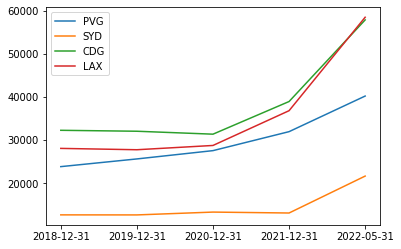

In [ ]:
fuel("PVG")
fuel("SYD")
fuel("CDG")
fuel("LAX")

# Question 4
For the top 20 airports with the most emissions in 2019, create a table that is sorted by airports with the greatest proportionate decrease in emissions from 2019 to 2020 (i.e., change in emissions over total 2019 emissions).

In [ ]:
#Get the data of 2019 and 2020
aviation_2019 = aviation[aviation['end_date']=="2019-12-31"]
aviation_2020 = aviation[aviation['end_date']=="2020-12-31"]

#Group by "asset name" and sum all the values
aviation_2019 = aviation_2019.groupby("asset_name").sum()
aviation_2020 = aviation_2020.groupby("asset_name").sum()

#Sort data of 2019 in ascending order by the CO2 emissions tonnes and get the top 20
aviation_2019=aviation_2019.sort_values("CO2_emissions_tonnes",ascending=False)
aviation_2019=aviation_2019[0:20]

#rename the column "CO2_emissions_tonnes"
aviation_2019.rename(columns={"CO2_emissions_tonnes":"CO2_emissions_2019"},inplace=True)
aviation_2020.rename(columns={"CO2_emissions_tonnes":"CO2_emissions_2020"},inplace=True)

#Add a column "proportion" in aviation_2019
aviation_final = aviation_2019.merge(aviation_2020, on="asset_name",how="left")
aviation_final["proportion"] = (aviation_final["CO2_emissions_2020"]-aviation_final["CO2_emissions_2019"]) / aviation_final["CO2_emissions_2019"]

In [ ]:
#Sort the values by proportion in ascending order
aviation_final = aviation_final.sort_values("proportion")
table = pandas.DataFrame(aviation_final["proportion"])
table

,proportion
asset_name,
Singapore Changi,-0.673767
Suvarnabhumi International,-0.640359
Dubai,-0.635321
Kingsford Smith,-0.629741
Heathrow,-0.627382
Beijing Capital International,-0.617415
John F Kennedy International,-0.590983
San Francisco International,-0.590276
Istanbul Airport,-0.587668
